# Linear Regression

### First version creating a linear regression from screatch

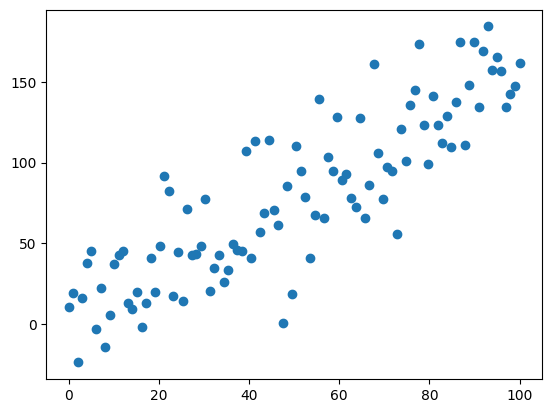

In [22]:
import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Genereting artificial data
X = np.linspace(0, 100, 100)
noise = np.random.normal(0, 25, 100)
y = 1.5 * X + 1.0 + noise

# Do the dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data's graphic
plt.scatter(X, y)

### Building a model with PyTorch

In [23]:
# Model
class LR(nn.Module): # all model in pytorch inherhits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    # all pytorch model need to overwrite this method
    def forward(self, x: torch.Tensor):
        # prediction
        return self.weights * x + self.bias


# Instanciating the model
model_0 = LR()
print(dict(model_0.state_dict()), '\n')

{'weights': tensor([-0.0987]), 'bias': tensor([0.3590])} 



### Training and testing

In [24]:
# setup a loss function
loss_fn = nn.MSELoss()

# setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


# training loop
epochs = 1500
for epoch in range(epochs):
    # set the model to training mode (all parameters will be set to requires gradients)
    model_0.train() 

    # 1. Make the prediction
    pred = model_0(torch.from_numpy(X_train))

    # 2. Calculate the loss
    loss = loss_fn(pred, torch.from_numpy(y_train))

    # 3. Turn the gradient to zero
    optimizer.zero_grad()

    # 4. Calculate the gradient
    loss.backward()

    # 5. Update the parameters according to the gradient
    optimizer.step()

### Comparing the results with ScikitLearn

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

# ScikitLearn model
'''print(f'w: {model.coef_},   b: {model.intercept_}')'''

ValueError: Expected 2D array, got 1D array instead:
array=[ 55.55555556  88.88888889  26.26262626  42.42424242  69.6969697
  15.15151515  40.4040404   96.96969697   9.09090909  72.72727273
  11.11111111  47.47474747  85.85858586  28.28282828  93.93939394
   5.05050505  66.66666667  65.65656566  35.35353535  16.16161616
  49.49494949  34.34343434   7.07070707  95.95959596  27.27272727
  19.19191919  81.81818182  25.25252525  62.62626263  13.13131313
  24.24242424   3.03030303  17.17171717  38.38383838   8.08080808
  78.78787879   6.06060606  64.64646465  36.36363636  89.8989899
  56.56565657 100.          54.54545455  43.43434343  50.50505051
  67.67676768  46.46464646  68.68686869  61.61616162  97.97979798
  79.7979798   41.41414141  58.58585859  48.48484848  98.98989899
  57.57575758  75.75757576  32.32323232  94.94949495  59.5959596
  63.63636364  84.84848485  37.37373737  29.29292929   1.01010101
  52.52525253  21.21212121   2.02020202  23.23232323  87.87878788
  91.91919192  74.74747475  86.86868687  82.82828283  20.2020202
  60.60606061  71.71717172  14.14141414  92.92929293  51.51515152].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [32]:
y_train.shape

(80,)